In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
#create dataframe
df = pd.read_csv("Diwali Sales Data.csv", encoding='ISO-8859-1')
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [10]:
df.shape
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount', 'Status', 'unnamed1'],
      dtype='object')

In [ ]:
#drop blank column
df.drop(["Status","unnamed1"],axis=1,inplace=True)
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [25]:
#statistical information
df.describe().T

,count,mean,std,min,25%,50%,75%,max
User_ID,11251.0,1.003004e+06,1716.125402,1000001.0,1001492.0,1003065.0,1004430.0,1006040.0
Age,11251.0,3.542121e+01,12.754122,12.0,27.0,33.0,43.0,92.0
Marital_Status,11251.0,4.203182e-01,0.493632,0.0,0.0,0.0,1.0,1.0
Orders,11251.0,2.489290e+00,1.115047,1.0,1.5,2.0,3.0,4.0
Amount,11239.0,9.453611e+03,5222.355869,188.0,5443.0,8109.0,12675.0,23952.0


In [29]:
#checking null value
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [31]:
#drop null values :Data Cleaning
df.dropna(inplace=True)

In [34]:
#change the datatype
df["Amount"]=df["Amount"].astype("int") 
df["Amount"].dtypes

dtype('int64')

# Exploratory Data Analysis #

In [36]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

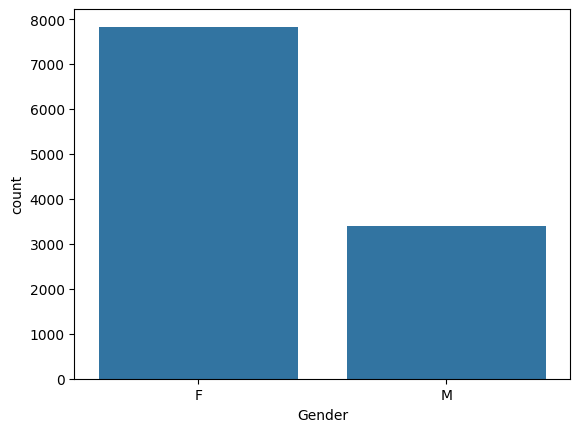

In [37]:
sns.countplot(x="Gender",data=df)
plt.show()

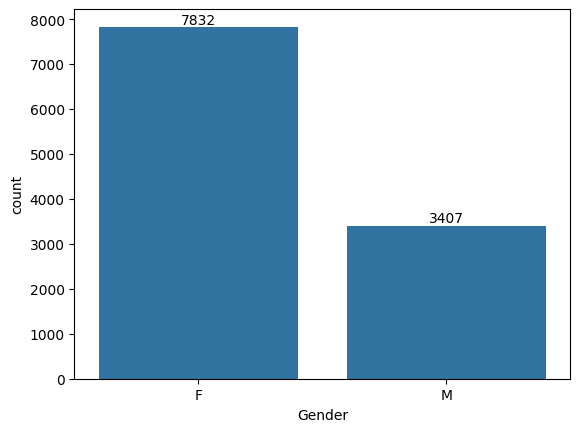

In [38]:
ax=sns.countplot(x="Gender",data=df)
for bars in ax.containers:
    ax.bar_label(bars)

In [ ]:
sales_gen=df.groupby(["Gender"],as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False)
sales_gen

,Gender,Amount
0,F,74335853
1,M,31913276


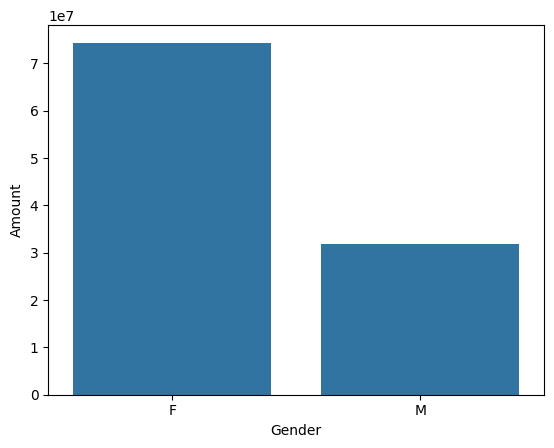

In [ ]:
sns.barplot(x="Gender",y="Amount",data=sales_gen)
plt.show()
# here we got to know majority of buyers are females and also their purchasing power is also higher than man

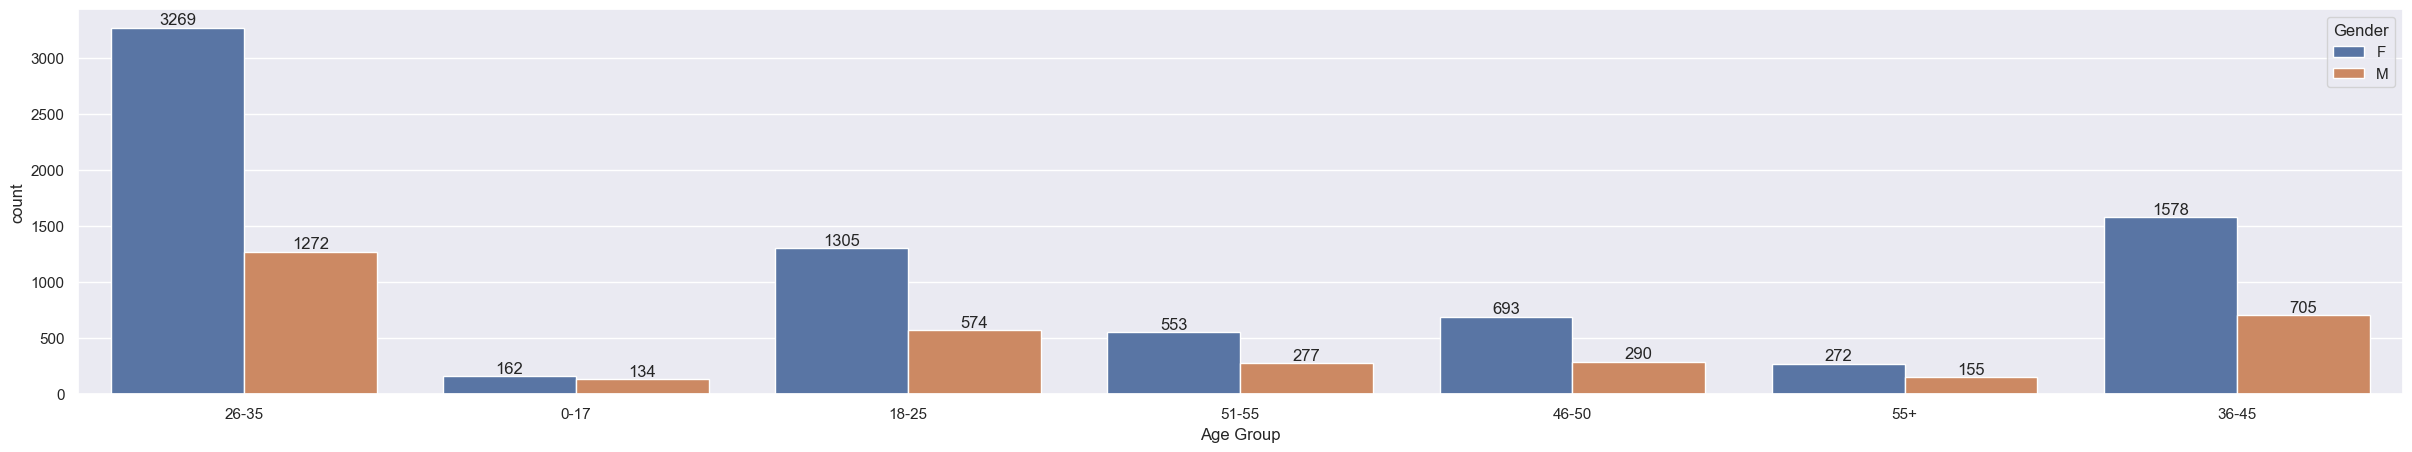

In [77]:
ax=sns.countplot(data=df,x="Age Group",hue="Gender")
for bars in ax.containers:
    ax.bar_label(bars)

In [51]:
sales_age=df.groupby(["Age Group"],as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False)
sales_age

,Age Group,Amount
2,26-35,42613442
3,36-45,22144994
1,18-25,17240732
4,46-50,9207844
5,51-55,8261477
6,55+,4080987
0,0-17,2699653


<Axes: xlabel='Age Group', ylabel='Amount'>

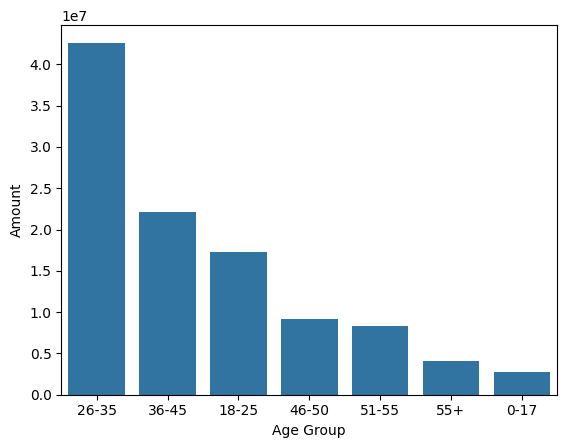

In [ ]:
sns.barplot(x="Age Group",y="Amount",data=sales_age)
# We can conclude that most of the buyers are of age group 26-35yr female

In [54]:
#total no. of orders from top 5 states
sales_state=df.groupby(["State"],as_index=False)["Orders"].sum().sort_values(by="Orders",ascending=False).head(5)
sales_state

,State,Orders
14,Uttar Pradesh,4807
10,Maharashtra,3810
7,Karnataka,3240
2,Delhi,2740
9,Madhya Pradesh,2252


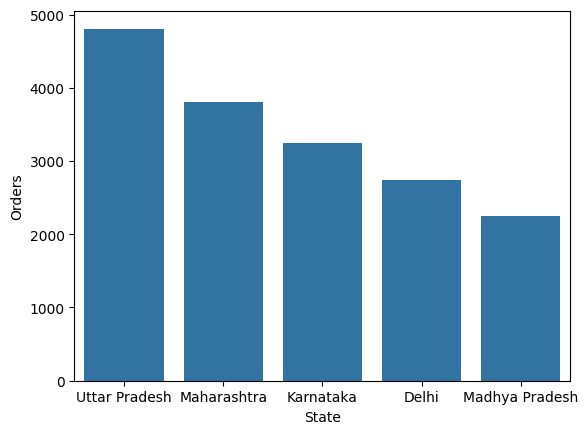

In [55]:
# To analyze top 5 states with maxmum orders 
sns.barplot(data=sales_state,x="State",y="Orders")
plt.show()

**Occupation of buyers**


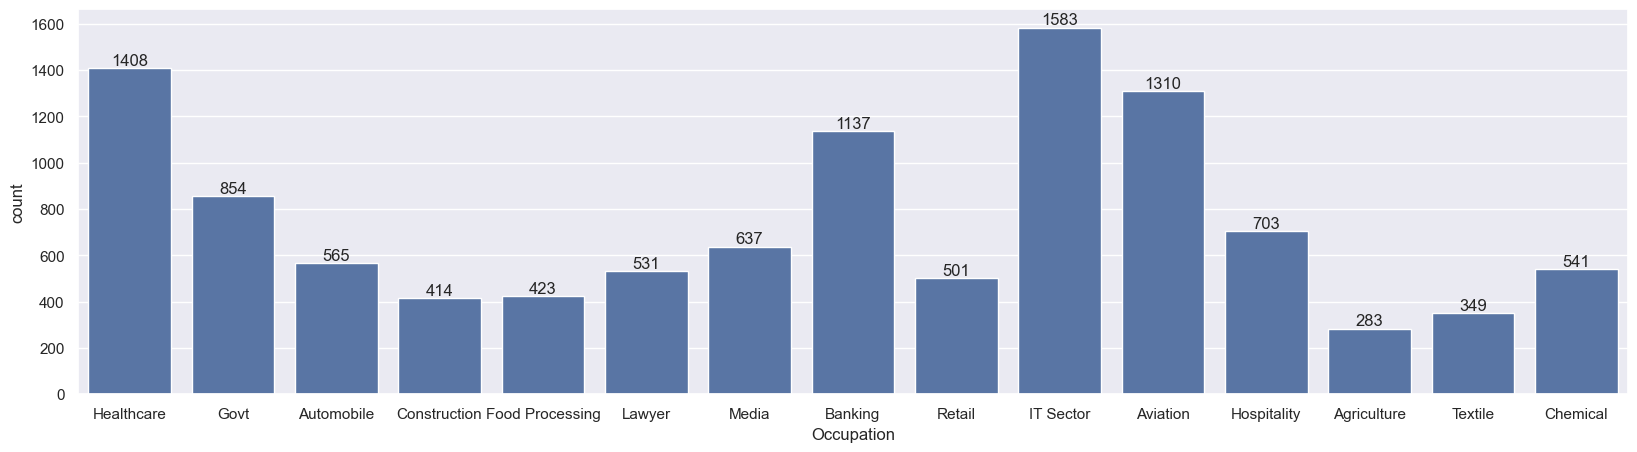

In [58]:
sns.set(rc={"figure.figsize": (20, 5)})
ax=sns.countplot(data=df,x="Occupation")
for bars in ax.containers:
    ax.bar_label(bars)

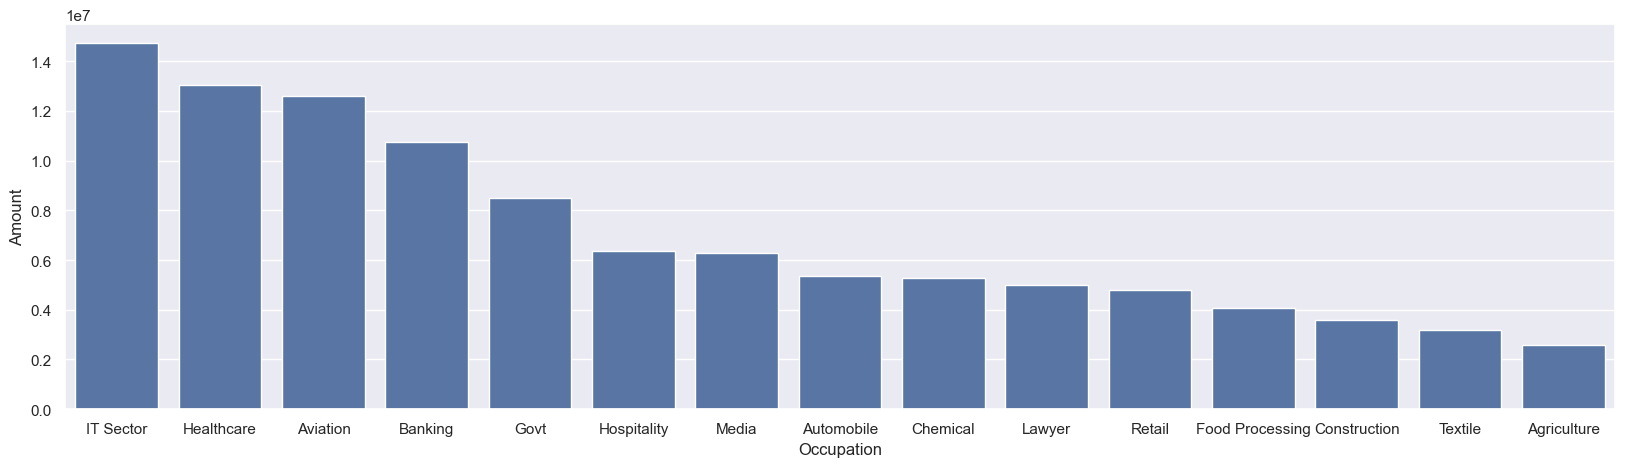

In [ ]:
sales2=df.groupby(["Occupation"],as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False)
sns.set(rc={"figure.figsize":(20,5)})
sns.barplot(data=sales2,x="Occupation",y="Amount")
plt.show()
#   Here we can conclude that top 3 buyers are from IT,HEALTHCARE,AVIATION sector

** product category**

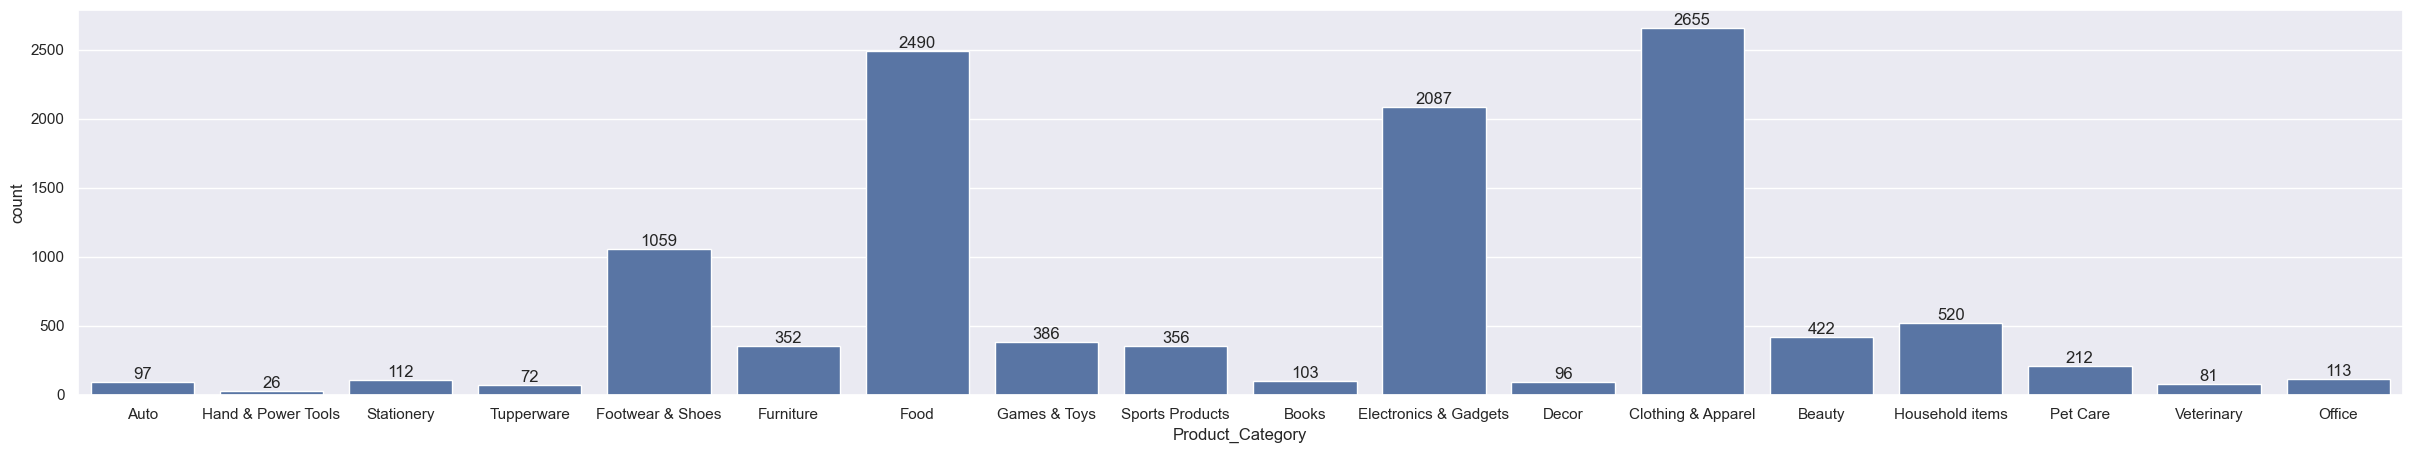

In [69]:
sns.set(rc={"figure.figsize":(30,5)})
ax=sns.countplot(data=df,x="Product_Category")
for bars in ax.containers:
    ax.bar_label(bars)

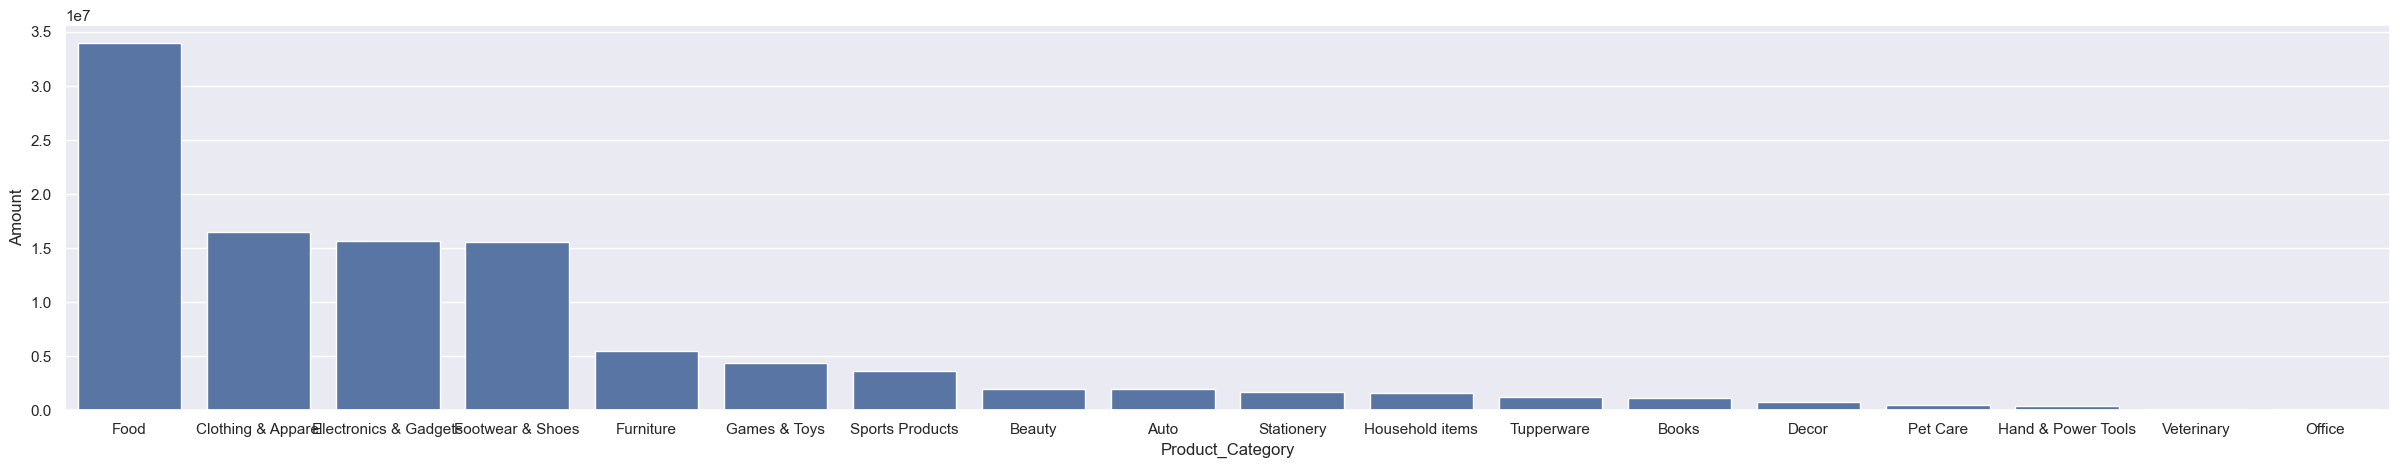

In [ ]:
sales3=df.groupby(["Product_Category"],as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False) 
sns.set(rc={"figure.figsize":(30,5)})
sns.barplot(data=sales3,x="Product_Category",y="Amount")
plt.show()
# Here we analyzed that most of the sold products are from Food

In [71]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')